In [14]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from matplotlib.ticker import MultipleLocator

import nn_model.globals
from response_analyzer import ResponseAnalyzer


In [15]:
# Interactive function to update the plot
def plot_neuron_activities(example_idx, predictions, targets, neuron_start=0, neurons_to_show=10, save_fig=False):
    # Define the main 2x2 grid figure
    fig, big_axes = plt.subplots(2, 2, figsize=(15, neurons_to_show*6))
    fig.suptitle(f'Overlayed Neuron Activities for Each Layer (Example {example_idx})', y=1.02)

    # Flatten the big_axes array for easy access
    big_axes = big_axes.flatten()

    # Loop over each layer and plot in a separate subplot grid cell
    for idx, (layer_name, pred_data) in enumerate(predictions.items()):
        # Select data for the specific example
        target_data = targets[layer_name][example_idx]  # Shape: (time, neurons)
        pred_data = pred_data[example_idx]              # Shape: (time, neurons)

        # Plot neurons within the selected range
        for neuron_idx in range(neuron_start, min(neuron_start + neurons_to_show, pred_data.shape[1])):
            ax = fig.add_subplot(2 * neurons_to_show, 2, (1 + (idx % 2) + (idx // 2) * (neurons_to_show * 2) + (neuron_idx - neuron_start) * 2))
            
            sns.lineplot(x=np.arange(pred_data.shape[0]), y=pred_data[:, neuron_idx], ax=ax, label='Prediction', color='blue')
            sns.lineplot(x=np.arange(target_data.shape[0]), y=target_data[:, neuron_idx], ax=ax, label='Target', color='red')
            
            # Set title and labels
            if neuron_idx == neuron_start:
                ax.set_title(f'Layer: {layer_name}')
            ax.set_ylabel(f'Neuron {neuron_idx}')
            ax.set_ylim(-0.2, 1.2)  # Set y-axis range from 0 to 1

        # Set x-axis label only for the bottom-most neuron in each layer plot
        ax.set_xlabel('Time')

    # Adjust layout and show the final figure
    plt.tight_layout(pad=0.01)
    if save_fig:
        plt.savefig(f"plot_images/neuron_activities_example_{example_idx}.png", bbox_inches="tight")
    else:
        plt.show()


In [42]:
train_spikes_dir = f"/home/beinhaud/diplomka/mcs-source/dataset/train_dataset/compressed_spikes/trimmed/size_{nn_model.globals.TIME_STEP}"
test_spikes_dir = f"/home/beinhaud/diplomka/mcs-source/dataset/test_dataset/compressed_spikes/trimmed/size_{nn_model.globals.TIME_STEP}"

# responses_dir = "/home/beinhaud/diplomka/mcs-source/evaluation_tools/evaluation_results/full_evaluation_results/model-10_step-20_lr-7e-06_complex_residual-False_neuron-layers-7_neuron-size-10"
# responses_dir = "/home/beinhaud/diplomka/mcs-source/evaluation_tools/evaluation_results/full_evaluation_results/model-10_step-20_lr-7e-06_complex_residual-True_neuron-layers-7_neuron-size-10_num-hidden-time-steps-1"
# responses_dir = "/home/beinhaud/diplomka/mcs-source/evaluation_tools/evaluation_results/full_evaluation_results/model-10_step-20_lr-7e-06_complex_residual-True_neuron-layers-5_neuron-size-10'
responses_dir = "/home/beinhaud/diplomka/mcs-source/evaluation_tools/evaluation_results/full_evaluation_results/model-10_step-10_lr-7e-06_complex_residual-True_neuron-layers-9_neuron-size-10_num-hidden-time-steps-1"

neuron_ids_path = "/home/beinhaud/diplomka/mcs-source/evaluation_tools/evaluation_subsets/neurons/model_size_10_subset_10.pkl"
images_ids_path = "/home/beinhaud/diplomka/mcs-source/evaluation_tools/evaluation_subsets/experiments/experiments_subset_10.pkl"

response_analyzer = ResponseAnalyzer(train_spikes_dir, test_spikes_dir, responses_dir, neuron_ids_path)#, images_ids_path)

100%|██████████| 90/90 [02:03<00:00,  1.37s/it]


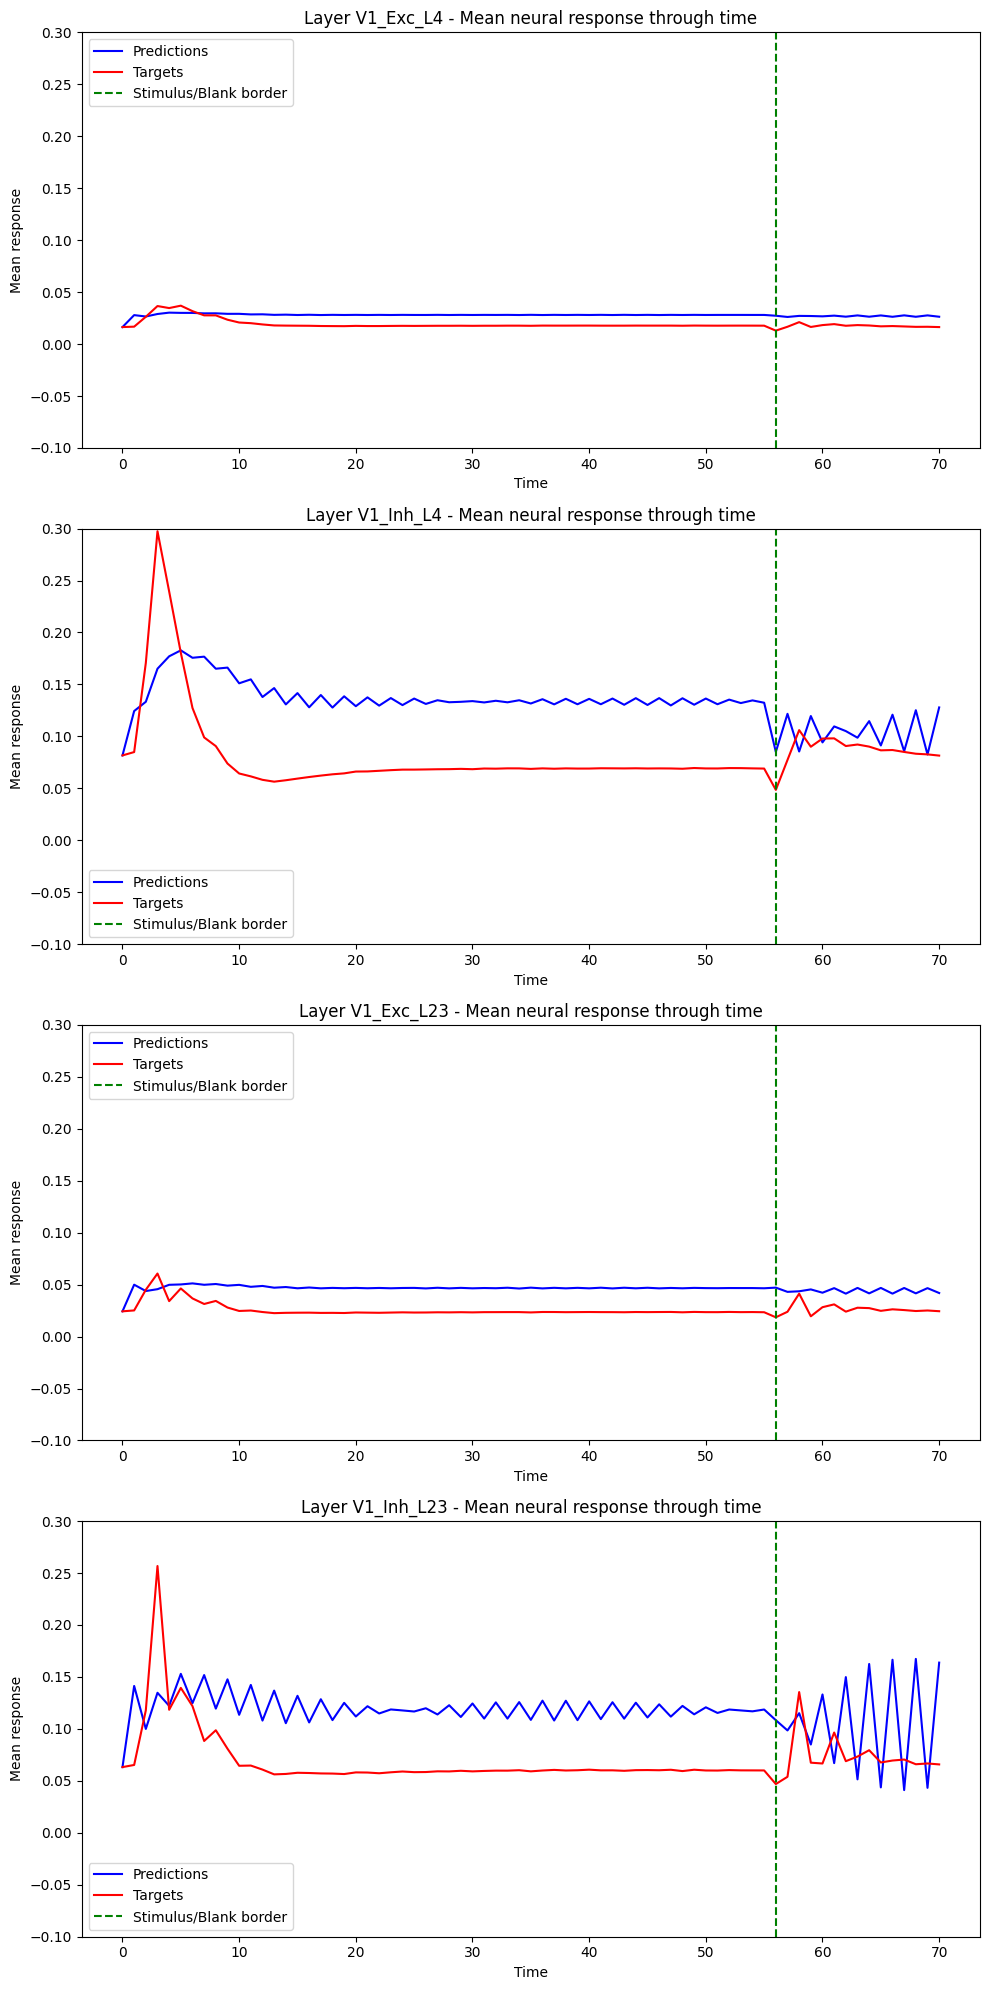

In [43]:
response_analyzer.get_mean_from_evaluated_data()
# response_analyzer.plot_mean_layer_data(response_analyzer.mean_layer_responses, True)
response_analyzer.plot_mean_layer_data({}, True, "prediction_mean", y_range=(-0.1, 0.3),
                                    #    save_fig_path="/home/beinhaud/diplomka/mcs-source/evaluation_tools/plot_images/mean_responses/size_10_step_10_simple.png"
                                       )


In [ ]:
# response_analyzer.get_rnn_responses_to_neuron_responses(subset=1)

  0%|          | 0/90 [00:00<?, ?it/s]/home/beinhaud/miniconda3/envs/neural_simulator/lib/python3.8/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental fe

tensor([[[-1.8346e-03,  1.5396e-01,  4.6777e-02,  ...,  4.9903e-02,
           3.7781e-03,  2.4289e-01],
         [ 1.1126e-02,  1.5944e-01,  4.8711e-02,  ...,  6.1050e-02,
           7.3811e-03,  2.6954e-01],
         [ 1.2759e-02,  1.7674e-01,  5.0005e-02,  ...,  6.1907e-02,
           8.1790e-03,  2.8894e-01],
         ...,
         [-6.4236e-03,  7.0700e-02,  6.7253e-03,  ...,  2.9305e-02,
          -6.7994e-03,  1.6154e-01],
         [-1.1448e-02,  5.6278e-02, -3.0545e-03,  ...,  2.3310e-02,
          -1.2200e-02,  1.4233e-01],
         [-1.2441e-02,  5.8965e-02,  7.3505e-03,  ...,  2.8940e-02,
          -7.4551e-03,  1.4631e-01]],

        [[ 1.6879e-02,  1.8621e-01,  3.0427e-02,  ...,  5.6542e-02,
           3.8946e-03,  2.5339e-01],
         [ 4.5655e-02,  2.7853e-01,  5.6387e-02,  ...,  6.5717e-02,
           1.0292e-02,  3.3871e-01],
         [ 4.5617e-02,  2.6458e-01,  6.3503e-02,  ...,  6.9050e-02,
           1.2867e-02,  3.2751e-01],
         ...,
         [-1.2272e-02,  6

{'predictions': {'V1_Exc_L4': array([-0.00183458,  0.15395835,  0.04677667, ...,  0.0244468 ,
         -0.00969274,  0.11580855]),
  'V1_Inh_L4': array([0.03786275, 0.04354196, 0.17553358, ..., 0.10854697, 0.06212274,
         0.08199163]),
  'V1_Exc_L23': array([0.05820854, 0.04427141, 0.07405771, ..., 0.09518731, 0.00840997,
         0.01599105]),
  'V1_Inh_L23': array([0.14270975, 0.10951314, 0.16721421, ..., 0.120662  , 0.06289587,
         0.04845244])},
 'rnn_predictions': {'V1_Exc_L4': array([ 0.00525676,  0.1621553 ,  0.05421299, ...,  0.03172465,
         -0.00265717,  0.12373477]),
  'V1_Inh_L4': array([-0.0378181 , -0.03228739,  0.09625301, ...,  0.03101792,
         -0.01419246,  0.00515692]),
  'V1_Exc_L23': array([0.27166945, 0.25774384, 0.28750548, ..., 0.30861762, 0.22191212,
         0.2294869 ]),
  'V1_Inh_L23': array([0.54092848, 0.50623012, 0.56654137, ..., 0.5178833 , 0.45750397,
         0.44240719])}}

In [33]:
# Flatten the 3D arrays to 1D
dnn_outputs = response_analyzer.rnn_to_prediction_responses["predictions"]
dnn_inputs = response_analyzer.rnn_to_prediction_responses["rnn_predictions"]

# Initialize a figure with subplots for each layer
num_layers = len(dnn_inputs)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Adjust grid size if necessary

# Flatten the subplot axes for easier iteration
axes = axes.flatten()

# Loop through each layer and plot
for i, (layer, ax) in enumerate(zip(dnn_inputs.keys(), axes)):
    # Flatten the arrays for the current layer
    layer_dnn_inputs = dnn_inputs[layer]#[:7000]
    layer_dnn_outputs = dnn_outputs[layer]#[:7000]
    
    # Create a scatter plot with Seaborn
    sns.scatterplot(
        x=layer_dnn_inputs, y=layer_dnn_outputs, alpha=0.5, s=10, ax=ax
    )
    # Add a reference line (y = x)
    ax.plot([0, 1], [0, 1], color='red', linestyle='--', label="y = x")
    
    # Set titles and labels
    ax.set_title(f"Layer {layer}")
    ax.set_xlabel("dnn_inputs")
    ax.set_ylabel("dnn_outputs")
    ax.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
plt.savefig("/home/beinhaud/diplomka/mcs-source/evaluation_tools/plot_images/dnn_module_dependencies.png")

KeyError: 'predictions'

In [19]:
# histogram_data = response_analyzer.create_spikes_histogram(subset=3)
# hist_counts, bin_edges = response_analyzer.create_spikes_histogram(subset=90)


In [20]:
# hist_counts, bin_edges

In [21]:
# # Plot the histogram

# # Calculate the total number of neurons (sum of all counts)
# total_neurons = hist_counts.sum()

# # Normalize the histogram to get probabilities
# hist_probabilities = hist_counts / total_neurons
# plt.figure(figsize=(10, 6))
# plt.bar(bin_edges[:-1], hist_probabilities, width=np.diff(bin_edges), align="edge", edgecolor="k")
# plt.xlabel("Number of Spikes")
# plt.ylabel("Probability of spike number")
# plt.title("Number of Neuron Spikes Distribution")
# # plt.show()
# plt.savefig(f"plot_images/num_spikes_histogram/histogram_size_{nn_model.globals.TIME_STEP}.png")

In [34]:
response_analyzer.get_mean_from_evaluated_data()
# response_analyzer.plot_mean_layer_data(response_analyzer.mean_layer_responses, True)
response_analyzer.plot_mean_layer_data({}, True, "prediction_mean", y_range=(-0.1, 0.3),
                                    #    save_fig_path="/home/beinhaud/diplomka/mcs-source/evaluation_tools/plot_images/mean_responses/size_10_step_10_simple.png"
                                       )


# plot_predictions_vs_targets(response_analyzer.mean_layer_responses)

 70%|███████   | 54/77 [00:28<00:12,  1.91it/s]


KeyboardInterrupt: 

  2%|▏         | 2/90 [00:58<42:55, 29.27s/it]


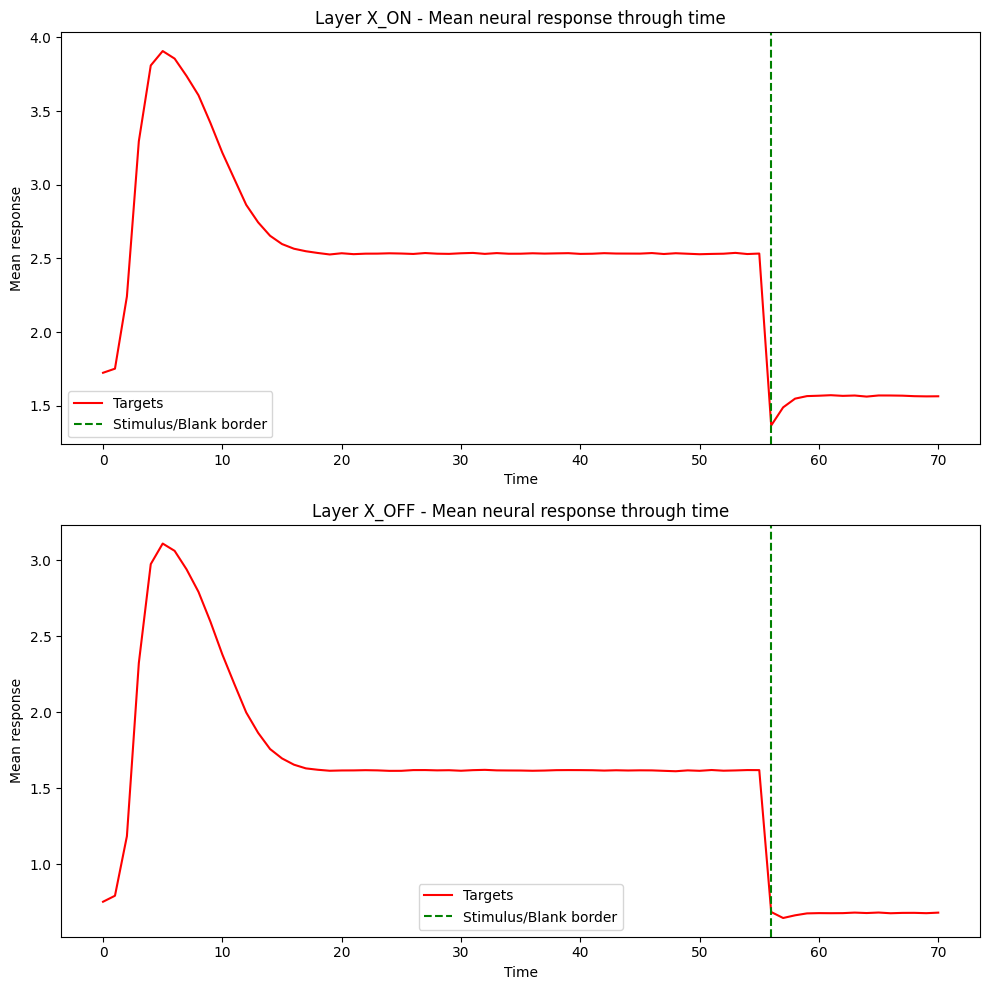

In [23]:
response_analyzer.get_original_data_mean_over_time(subset=2)
response_analyzer.plot_mean_layer_data({}, False, identifier="input_mean")